In [160]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [161]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [162]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [163]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [164]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [165]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [166]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [167]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

## Sepal length vs Sepal Width (Setosa vs Versicolor)



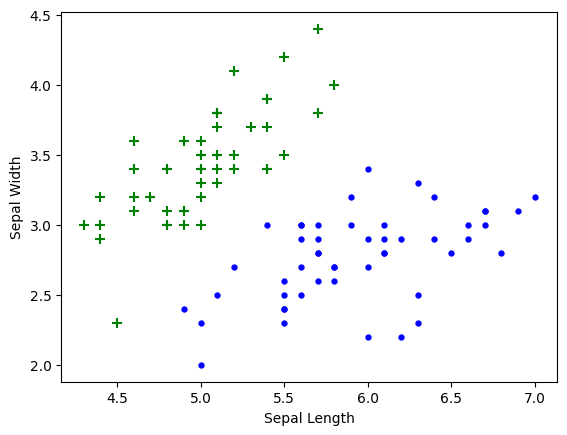

In [169]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+',s=50)
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.',s=50)

## Petal length vs Pepal Width (Setosa vs Versicolor)



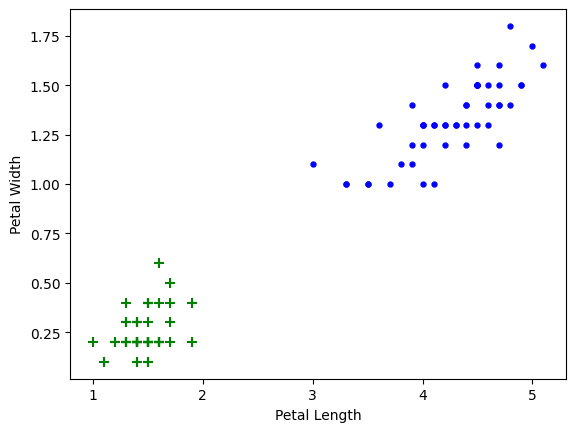

In [170]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+',s=50)
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.',s=50)

## Splitting the training & test data

In [171]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Train Using Support Vector Machine (SVM)

In [173]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [174]:
model.score(X_test, y_test)

0.9666666666666667

In [175]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

## Tune parameters



### 1.Regularization (C)

In [202]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [205]:
model_C = SVC(C=50)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

### 2. Gamma



In [206]:
model_g = SVC(gamma=8)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

### 3.Kernel

In [207]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [208]:
model_linear_kernal.score(X_test, y_test)

1.0